# Exploratory Data Analysis

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

https://data.world/rajanand/crime-in-india/workspace/file?filename=42_District_wise_crimes_committed_against_women_2001_2012.csv

In [33]:
!pip3 install pyshp

In [2]:
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
sns.set_style('whitegrid')

In [2]:
#Data loading as a dataframe
data = pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')

In [3]:
data.shape

(9017, 10)

In [4]:
data.describe()

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,53.041366,58.535433,20.228901,100.511257,27.515582,194.122435,0.197849
std,3.463623,190.741450,246.937464,96.970466,394.059436,167.237522,831.986594,2.415039
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,2007.000000,20.000000,18.000000,5.000000,31.000000,2.000000,47.000000,0.000000
75%,2010.000000,41.000000,42.000000,16.000000,76.000000,13.000000,135.000000,0.000000
max,2012.000000,3425.000000,7910.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   Year                                                 9017 non-null   int64 
 3   Rape                                                 9017 non-null   int64 
 4   Kidnapping and Abduction                             9017 non-null   int64 
 5   Dowry Deaths                                         9017 non-null   int64 
 6   Assault on women with intent to outrage her modesty  9017 non-null   int64 
 7   Insult to modesty of Women                           9017 non-null   int64 
 8   Cruelty by Husband or his Relatives                  9017 non-null   int64 
 9

In [6]:
data.isnull().sum()
#No missing values present

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [7]:
len(data['DISTRICT'].unique())

808

In [8]:
data['DISTRICT'].value_counts().head(20)

TOTAL         408
G.R.P.         46
SOUTH          37
NORTH          37
WEST           36
RAILWAYS       35
HAMIRPUR       24
EAST           24
BILASPUR       24
BALRAMPUR      24
PRATAPGARH     17
GRP            14
BOUDH          12
KEONJHAR       12
RAYAGADA       12
PURI           12
NUAPADA        12
TUENSANG       12
WOKHA          12
NOWRANGPUR     12
Name: DISTRICT, dtype: int64

Check the number of districts with respect to each state and year (the numbers are mostly in GRP, 
                                                                   North, South, North, and East)

The numbers where there is 1 e.g. RAILWAYS KMR, there is only 1 row for 1 state 
(Jammu and Kashmir in this case)

In [9]:
data.loc[data['DISTRICT'] == 'KEONJHAR']

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
454,ODISHA,KEONJHAR,2001,38,19,4,127,16,41,0
1171,ODISHA,KEONJHAR,2002,42,23,4,157,19,25,0
1900,ODISHA,KEONJHAR,2003,37,25,14,84,17,55,0
2628,ODISHA,KEONJHAR,2004,39,14,16,87,6,15,0
3362,ODISHA,KEONJHAR,2005,36,21,12,89,15,20,0
4096,ODISHA,KEONJHAR,2006,53,32,10,152,13,20,0
4839,ODISHA,KEONJHAR,2007,41,32,21,211,10,25,0
5592,ODISHA,KEONJHAR,2008,66,46,22,203,27,34,0
6357,ODISHA,KEONJHAR,2009,53,33,20,195,16,45,0
7132,ODISHA,KEONJHAR,2010,45,32,18,107,8,85,0


In [17]:
data[data['DISTRICT'].duplicated()]

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
42,ARUNACHAL PRADESH,TOTAL,2001,33,55,0,78,3,11,0
70,ASSAM,TOTAL,2001,817,1070,59,850,4,1248,0
115,BIHAR,TOTAL,2001,888,518,859,562,21,1558,83
135,CHHATTISGARH,TOTAL,2001,959,171,70,1763,161,840,0
138,GOA,TOTAL,2001,12,6,2,17,7,11,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [10]:
data[data.duplicated()]

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls


There are duplicate rows for different states though, but there are no duplicate rows if we consider 
for the whole dataframe

In [11]:
data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [12]:
len(data['STATE/UT'].unique())

35

The data has total 35 states and union territories, but there are 36 as of 2022 (Telangana state is missing in the dataset)

In [13]:
data.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [14]:
victims_raped = data['Rape'].sum()
victims_kidnapped_abducted = data['Kidnapping and Abduction'].sum()
dowry_death = data['Dowry Deaths'].sum()
modesty_assault = data['Assault on women with intent to outrage her modesty'].sum()
insult_to_modesty = data['Insult to modesty of Women'].sum()
domestic_violence = data['Cruelty by Husband or his Relatives'].sum()
girls_imported = data['Importation of Girls'].sum()

In [15]:
total_population_of_victim_overall = victims_raped + victims_kidnapped_abducted + dowry_death +modesty_assault+ insult_to_modesty + domestic_violence+ girls_imported
total_population_of_victim_overall

4095096

This above analysis potrays a dire situation of women in our society, 
as more than 4 million number of females, over the years 2001-2012, 
have been a victim of assault, violance, rape or even death, in India alone.

# Data Visualization

So, data exploration and visualization can be performed to understand the data more.

The heatmap is created using seaborn to observe the correlation between the variables. The created correlation matrix shows the single correlation between each feature with other features on the dataset.

If 2 variables are correlated to each other by:

0.0 to 0.3, they are weakly correlated,

0.3 to 0.6, they are moderately correlated,

0.6 to 0.9, they are strongly correlated,

finally, >0.9, they are very strongly correlated

Positive and negative indicates whether the variables are directly or inversely related 
e.g. a correlation of -0.7 between 2 variables denote that if one variable increases, 
the other decreases strongly (as defined in the list above)

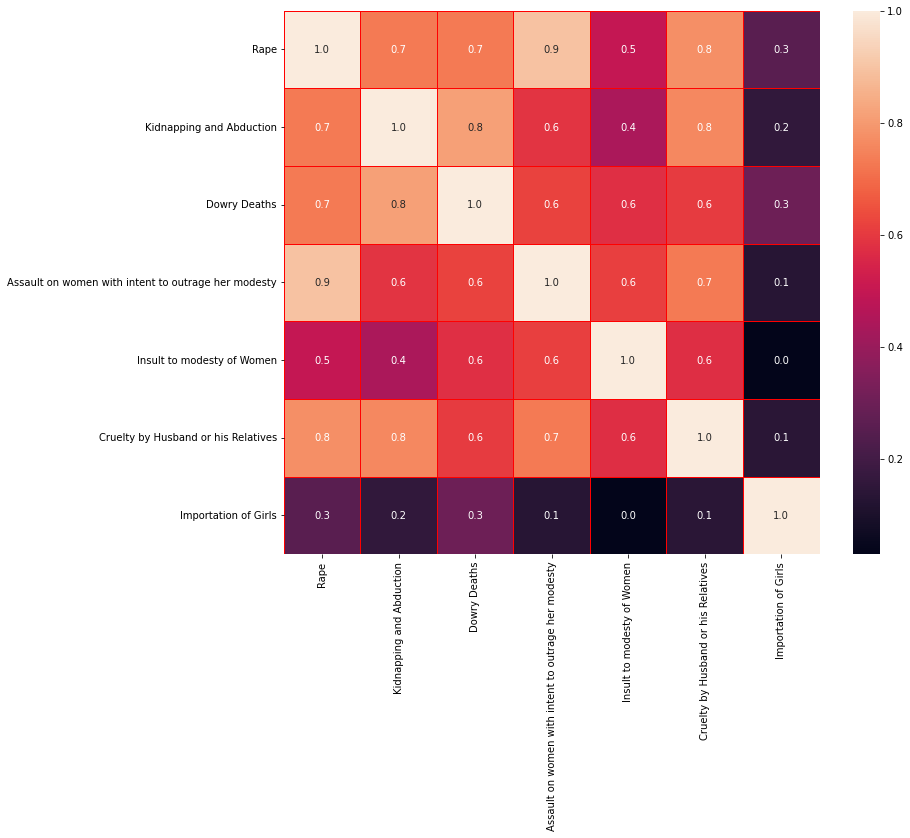

In [16]:
# use plot
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data.loc[:, ['STATE/UT', 'DISTRICT','Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls']].corr(),
            annot = True,
            linecolor = 'r',
            linewidths = .5,
            fmt = '.1f',
            ax = ax);
plt.show()

To decode some observations above, the feature 'Rape' is highly influenced by features like

'Cruelty by Husband or Relatives' (correlation coefficient: 0.8), 
'Assault on women with intent to outrage her modesty' (correlation coefficient: 0.9),
'Dowry deaths' (correlation coefficient: 0.7),
'Kidnapping and abduction' (correlation coefficient: 0.7)

The other observations related to 'Dowry deaths', 'Kidnapping and abduction', 
'Assault on women with intent to outrage her modesty' can also be found from the above correlation
heat map.

In [17]:
data.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [18]:
data.tail()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0
9016,PUDUCHERRY,TOTAL,2012,13,16,0,9,2,6,0


Text(0, 0.5, 'Cases of Insult to modesty of Women in India')

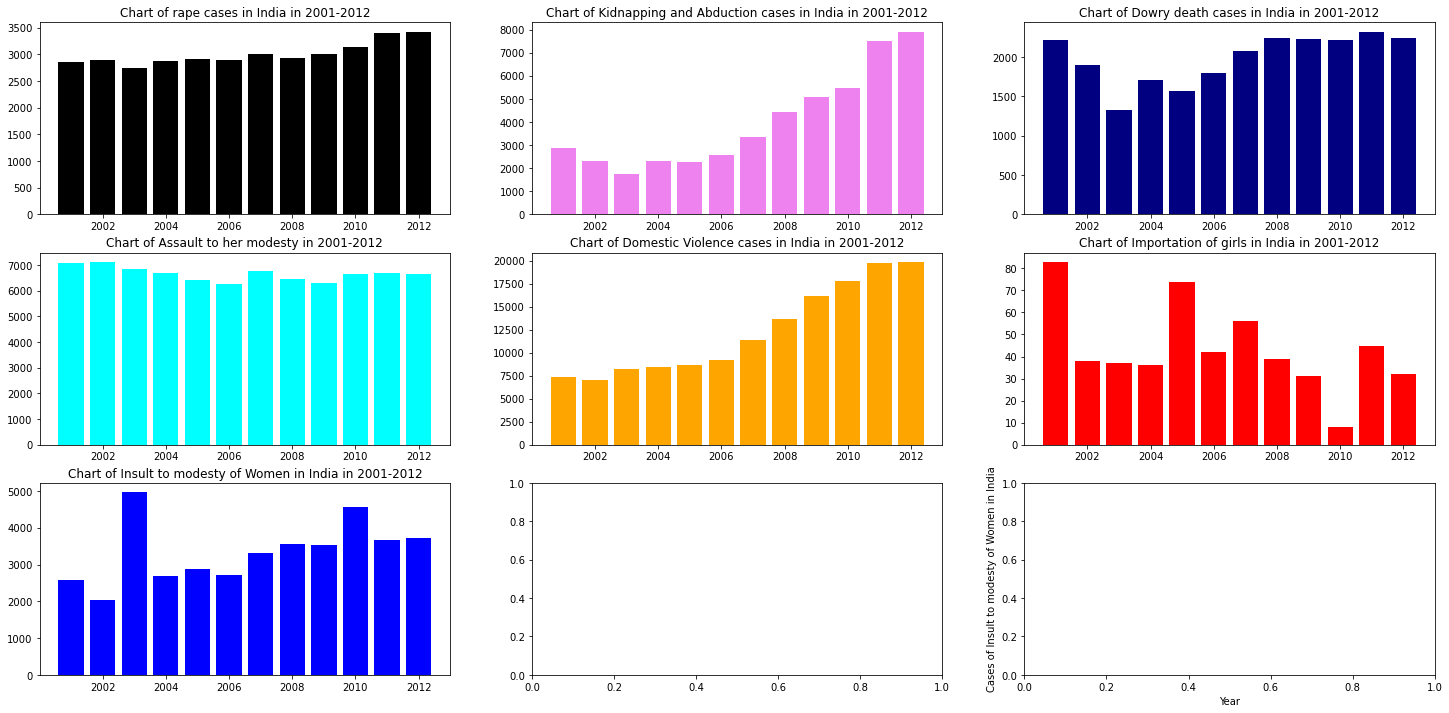

In [19]:
#Bar charts of every crime over time from the year 2001 to 2012 
fig, axes = plt.subplots(3, 3, figsize=(25, 12))

axes[0,0].set_title("Chart of rape cases in India in 2001-2012")
axes[0,0].bar(data['Year'], data['Rape'], color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Rape in India') #Y-axis

axes[0,1].set_title("Chart of Kidnapping and Abduction cases in India in 2001-2012")
axes[0,1].bar(data['Year'], data['Kidnapping and Abduction'], color = 'violet');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Kidnapping and Abduction in India') #Y-axis

axes[0,2].set_title("Chart of Dowry death cases in India in 2001-2012")
axes[0,2].bar(data['Year'], data['Dowry Deaths'], color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Dowry deaths in India') #Y-axis

axes[1,0].set_title("Chart of Assault to her modesty in 2001-2012")
axes[1,0].bar(data['Year'], data['Assault on women with intent to outrage her modesty'], color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Assaulting a women for her modesty in India') #Y-axis

axes[1,1].set_title("Chart of Domestic Violence cases in India in 2001-2012")
axes[1,1].bar(data['Year'], data['Cruelty by Husband or his Relatives'], color = 'orange');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Domestic Violence in India') #Y-axis

axes[1,2].set_title("Chart of Importation of girls in India in 2001-2012")
axes[1,2].bar(data['Year'], data['Importation of Girls'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases ofImportation of girls in India') #Y-axis

axes[2,0].set_title("Chart of Insult to modesty of Women in India in 2001-2012")
axes[2,0].bar(data['Year'], data['Insult to modesty of Women'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Insult to modesty of Women in India') #Y-axis

In [21]:
pd.pivot_table(data, values ='Rape', index =['STATE/UT','DISTRICT', 'Year'],
                          aggfunc = max)
#Pivot table representation of a particular crime by 'Year' and 'State' features

Rape
STATE/UT      DISTRICT        Year      
A & N ISLANDS A and N ISLANDS 2007     3
              ANDAMAN         2001     3
                              2002     1
                              2003     2
                              2004    10
...                                  ...
WEST BENGAL   UTTAR DINAJPUR  2008    78
                              2009    80
                              2010   130
                              2011   126
                              2012    92

[9016 rows x 1 columns]

In [22]:
#Grouping by each state/ut
gkk = data.groupby('STATE/UT')

In [23]:
# Print the first value in each group
gkk.first()

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
STATE/UT,,,,,,,,,
A & N ISLANDS,ANDAMAN,2001,3,2,0,18,1,9,0
ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
ARUNACHAL PRADESH,CHANGLANG,2001,1,2,0,3,0,0,0
ASSAM,BARPETA,2001,28,88,10,29,0,95,0
BIHAR,ARARIA,2001,93,13,11,3,0,50,0
CHANDIGARH,CHANDIGARH,2001,18,50,3,24,15,36,0
CHHATTISGARH,BALRAMPUR,2001,17,1,1,18,0,7,0
D & N HAVELI,D and N HAVELI,2001,6,2,0,7,0,4,0
DAMAN & DIU,DAMAN,2001,0,3,0,0,0,4,0


In [24]:
# Print the maximum value in each group
gkk.max()

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
STATE/UT,,,,,,,,,
A & N ISLANDS,TOTAL,2012,24,14,2,31,10,26,0
ANDHRA PRADESH,WEST GODAVARI,2012,1442,1612,613,5147,4562,13389,7
ARUNACHAL PRADESH,UPPER DIBANG VALLEY,2012,59,60,1,84,6,26,0
ASSAM,UDALGURI,2012,1721,3360,175,1840,20,6407,3
BIHAR,VAISHALI,2012,1555,3789,1413,999,53,3686,83
CHANDIGARH,TOTAL,2012,33,66,10,45,28,112,0
CHHATTISGARH,TOTAL,2012,1053,365,128,1763,182,980,2
D & N HAVELI,TOTAL,2012,7,14,1,11,2,5,0
DAMAN & DIU,TOTAL,2012,5,3,1,4,1,5,0


The above group by (maximum value) operations can help us to identify the districts of the state/ut
where the crimes were committed the most (e.g. Varanasi in UP had 7910 kidnapping and abduction cases 
in the year 2012, tripura west had 937 domestic violence based cases in the year 2012)

The number of all the crimes were committed in the year 2012, which indicates that the number of 
crimes were in the rise over time till the last year of 2012(this is the last year which is in the dataset)

Of course, if we can extract more data till now, the trend should be rising too, which states that 
the situation is not at all good for Indian women.

In [25]:
# Print the last value in each group
gkk.last()

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
STATE/UT,,,,,,,,,
A & N ISLANDS,TOTAL,2012,12,7,2,17,4,5,0
ANDHRA PRADESH,TOTAL,2012,1341,1403,504,4816,3714,13389,0
ARUNACHAL PRADESH,TOTAL,2012,46,58,1,67,2,26,0
ASSAM,TOTAL,2012,1716,3360,140,1840,5,6407,2
BIHAR,TOTAL,2012,927,3789,1275,118,37,3686,4
CHANDIGARH,TOTAL,2012,27,66,5,45,25,73,0
CHHATTISGARH,TOTAL,2012,1034,350,81,1601,162,980,0
D & N HAVELI,TOTAL,2012,3,9,0,2,0,0,0
DAMAN & DIU,TOTAL,2012,5,0,0,0,0,3,0


In [26]:
#Representation of the data on Indian Map
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
sns.set_style('whitegrid')

In [27]:
#Load the data
fp = 'india-polygon.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In the above snippet, the Indian map is represented using the polygon shape file which consists of
details of the States and Union Territories.
map_df is a geopandas GeoDataFrame as shown above. The geopandas library is used in this case to load the shape file (india-polygon.shp).

In [54]:
type(map_df)

geopandas.geodataframe.GeoDataFrame

In [29]:
g7 = pd.DataFrame(data.groupby(['STATE/UT'])['Rape'].count().reset_index())
g7.columns = ['State/UT','Cases Reported']

In [30]:
g7.set_index('State/UT')

,Cases Reported
State/UT,
A & N ISLANDS,36
ANDHRA PRADESH,370
ARUNACHAL PRADESH,195
ASSAM,362
BIHAR,540
CHANDIGARH,24
CHHATTISGARH,266
D & N HAVELI,24
DAMAN & DIU,36


In [31]:
"""
The state_nm column is renamed as State/UT to ease the joining of the column with that of group by 
dataframe later
"""

map_df.rename(columns = {'st_nm':'State/UT'}, inplace = True)
map_df.head()

,id,State/UT,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [35]:
map_df['State/UT'][map_df['State/UT']=='Andaman and Nicobar Islands'] = 'A & N ISLANDS'
map_df['State/UT'][map_df['State/UT']=='Andhra Pradesh'] = 'ANDHRA PRADESH'
map_df['State/UT'][map_df['State/UT']=='Arunachal Pradesh'] = 'ARUNACHAL PRADESH'
map_df['State/UT'][map_df['State/UT']=='Assam'] = 'ASSAM'
map_df['State/UT'][map_df['State/UT']=='Bihar'] = 'BIHAR'
map_df['State/UT'][map_df['State/UT']=='Chandigarh'] = 'CHANDIGARH'
map_df['State/UT'][map_df['State/UT']=='Chhattisgarh'] = 'CHHATTISGARH'
map_df['State/UT'][map_df['State/UT']=='Dadra and Nagar Haveli'] = 'D & N HAVELI'
map_df['State/UT'][map_df['State/UT']=='Daman and Diu'] = 'DAMAN & DIU'
map_df['State/UT'][map_df['State/UT']=='Goa'] = 'GOA'
map_df['State/UT'][map_df['State/UT']=='Gujarat'] = 'GUJARAT'
map_df['State/UT'][map_df['State/UT']=='Haryana'] = 'HARYANA'
map_df['State/UT'][map_df['State/UT']=='Himachal Pradesh'] = 'HIMACHAL PRADESH'
map_df['State/UT'][map_df['State/UT']=='Jharkhand'] = 'JHARKHAND'
map_df['State/UT'][map_df['State/UT']=='Karnataka'] = 'KARNATAKA'
map_df['State/UT'][map_df['State/UT']=='Kerala'] = 'KERALA'
map_df['State/UT'][map_df['State/UT']=='Lakshadweep'] = 'LAKSHADWEEP'
map_df['State/UT'][map_df['State/UT']=='Madhya Pradesh'] = 'MADHYA PRADESH'
map_df['State/UT'][map_df['State/UT']=='Maharashtra'] = 'MAHARASHTRA'
map_df['State/UT'][map_df['State/UT']=='Manipur'] = 'MANIPUR'
map_df['State/UT'][map_df['State/UT']=='Meghalaya'] = 'MEGHALAYA'
map_df['State/UT'][map_df['State/UT']=='Mizoram'] = 'MIZORAM'
map_df['State/UT'][map_df['State/UT']=='Nagaland'] = 'NAGALAND'
map_df['State/UT'][map_df['State/UT']=='Delhi'] = 'DELHI'
map_df['State/UT'][map_df['State/UT']=='Puducherry'] = 'PUDUCHERRY'
map_df['State/UT'][map_df['State/UT']=='Punjab'] = 'PUNJAB'
map_df['State/UT'][map_df['State/UT']=='Rajasthan'] = 'RAJASTHAN'
map_df['State/UT'][map_df['State/UT']=='Sikkim'] = 'SIKKIM'
map_df['State/UT'][map_df['State/UT']=='Tamil Nadu'] = 'TAMIL NADU'
map_df['State/UT'][map_df['State/UT']=='Tripura'] = 'TRIPURA'
map_df['State/UT'][map_df['State/UT']=='Uttar Pradesh'] = 'UTTAR PRADESH'
map_df['State/UT'][map_df['State/UT']=='West Bengal'] = 'WEST BENGAL'
map_df['State/UT'][map_df['State/UT']=='Odisha'] = 'ODISHA'
map_df['State/UT'][map_df['State/UT']=='Andhra Pradesh'] = 'ANDHRA PRADESH'
map_df['State/UT'][map_df['State/UT']=='Jammu and Kashmir'] = 'JAMMU & KASHMIR'

The State/UT entries in the map_df dataframe are renamed to match with that of the group by dataframe
file in the next cell.

In [36]:
map_df.head()

,id,State/UT,geometry
0,None,A & N ISLANDS,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,ARUNACHAL PRADESH,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,ASSAM,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,BIHAR,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,CHANDIGARH,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


The main objective here is to map the crime based data into the India map for each state and union territory

The purple ones have the maximum concentration (like in Madhya Pradesh), in the southern parts of India the concentration is less in terms of the crime Rape. The North Indian states like Rajasthan, Uttar Pradesh, and Eastern state like West Bengal shows high concentration of the crime.

The states like Ladakh and Telengana are availabe in the shape file but not in the crime data,
so the maps in the extreme north and in the middle are white, if there is crime data available
in the later version of the dataset,  
it can be merged with the geopandas dataframe and the map can then be complete. 

Uttar Pradesh, West Bengal and Bihar shows high concentration of the crime as can be seen in the map.
Other states have relatively lower density in terms of this crime. 

Outlier Detection Techniques

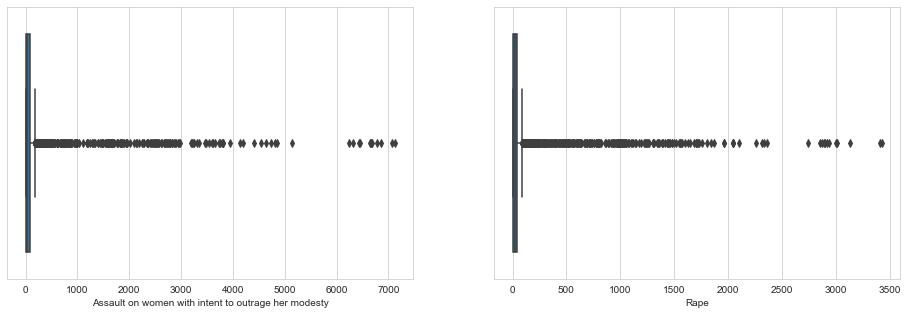

In [38]:
#Outlier Detection using Boxplot method

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)

sns.boxplot(data['Assault on women with intent to outrage her modesty'])

plt.subplot(1,2,2)

sns.boxplot(data['Rape'])

plt.show()

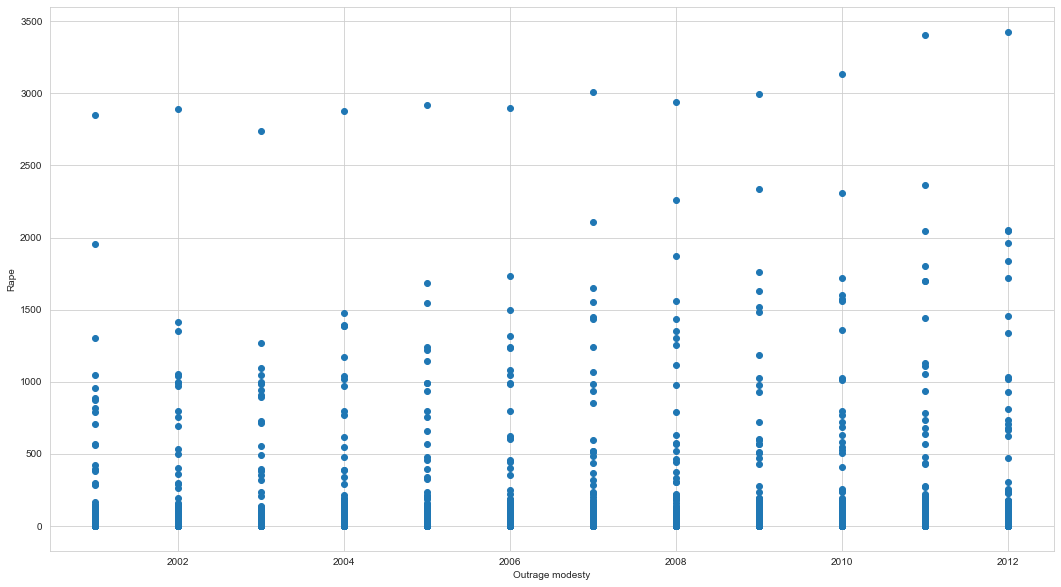

In [44]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(data['Year'], data['Rape'])
 
# x-axis label
ax.set_xlabel('Outrage modesty')
 
# y-axis label
ax.set_ylabel('Rape')
plt.show()

In [40]:
# Z score
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(data['Rape']))
print(z)

0       0.015946
1       0.157507
2       0.136535
3       0.173236
4       0.157507
          ...   
9012    0.278095
9013    0.278095
9014    0.246637
9015    0.241394
9016    0.209936
Name: Rape, Length: 9017, dtype: float64


In [41]:
threshold = 3
 
# Position of the outlier
print(np.where(z > 3))

(array([  28,   70,  115,  135,  351,  397,  470,  529,  650,  688,  744,
        786,  831,  851,  970, 1068, 1114, 1187, 1246, 1366, 1406, 1464,
       1508, 1553, 1574, 1693, 1797, 1843, 1916, 1975, 2095, 2135, 2192,
       2236, 2281, 2302, 2421, 2525, 2571, 2644, 2703, 2824, 2864, 2921,
       2968, 3013, 3035, 3155, 3259, 3305, 3378, 3437, 3557, 3597, 3609,
       3654, 3701, 3746, 3768, 3889, 3993, 4039, 4112, 4177, 4297, 4336,
       4394, 4441, 4486, 4508, 4631, 4735, 4781, 4855, 4920, 5040, 5079,
       5137, 5184, 5229, 5251, 5309, 5378, 5485, 5531, 5608, 5674, 5796,
       5835, 5898, 5946, 5991, 6013, 6143, 6250, 6296, 6373, 6439, 6563,
       6602, 6669, 6718, 6763, 6785, 6844, 6917, 6971, 7025, 7071, 7148,
       7216, 7262, 7342, 7381, 7448, 7497, 7542, 7565, 7626, 7699, 7735,
       7756, 7810, 7856, 7933, 8004, 8049, 8132, 8172, 8239, 8290, 8335,
       8364, 8426, 8500, 8557, 8611, 8657, 8734, 8763, 8806, 8851, 8938,
       8982, 8997], dtype=int64),)


Outlier Detection using z-score method

Z score is also known as standard score. Z score explains how many standard deviations away a data point is from the mean, It helps to understand if a data value is greater or smaller than mean.

We calculate the Z-Scores for each column and set a threshold, which shows that the data point is quite different from the other data points

In [42]:
# IQR
Q1 = np.percentile(data['Rape'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['Rape'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [43]:
# Above Upper bound
upper = data['Rape'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = data['Rape'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0       False
1       False
2       False
3       False
4       False
        ...  
9012    False
9013    False
9014    False
9015    False
9016    False
Name: Rape, Length: 9017, dtype: bool
(array([  28,   70,   71,  115,  121,  132,  134,  135,  169,  190,  204,
        228,  253,  285,  302,  305,  307,  310,  316,  322,  335,  338,
        350,  351,  370,  397,  470,  495,  529,  573,  578,  592,  650,
        688,  700,  707,  724,  744,  786,  787,  831,  837,  848,  850,
        851,  885,  906,  920,  945,  970, 1002, 1019, 1022, 1024, 1030,
       1033, 1037, 1051, 1055, 1067, 1068, 1087, 1114, 1187, 1212, 1246,
       1289, 1294, 1366, 1406, 1418, 1425, 1463, 1464, 1502, 1508, 1526,
       1553, 1559, 1571, 1573, 1574, 1608, 1629, 1643, 1668, 1693, 1725,
       1745, 1750, 1752, 1768, 1784, 1796, 1797, 1816, 1843, 1916, 1941,
       1975, 2018, 2023, 2095, 2109, 2110, 2127, 2128, 2135, 2147, 2154,
       2179, 2192, 2230, 2236, 2243, 2263, 2281, 2287, 2299, 230

Interquartile range (IQR)

IQR measures the variability by dividing a data set into quartiles. Q1, Q2, Q3 called first, second and third quartiles are the values for splitting the dataset.

Q1 represents the 25th percentile of the data.
Q2 represents the 50th percentile of the data also known as the median.
Q3 represents the 75th percentile of the data.

IQR is the range between the first and the third quartiles namely Q1 and Q3: 
IQR = Q3 — Q1. 
The data points < Q1–1.5 IQR or > Q3 + 1.5 IQR are outliers.

In [ ]:
#https://medium.com/analytics-vidhya/descriptive-predictive-and-feature-selection-on-time-series-data-813a202312b1

#https://www.pantechelearning.com/product/crime-analysis-using-k-means/

#https://www.kaggle.com/code/nehaprabhavalkar/crimes-in-india-analysis
#https://jovian.ai/sathi-satb/crime-against-women
#https://shankhanilborthakur.medium.com/plotting-data-visualisation-on-the-map-of-india-using-geopandas-in-python-211bc88c1e4d
#https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
#https://www.youtube.com/watch?v=CufrdKUrU3g&ab_channel=PriyangBhatt (Crime Forecasting)